In [3]:
from sympy import *
from sympy.physics.hep.gamma_matrices import GammaMatrix as G, LorentzIndex, gamma_trace
from sympy.tensor.tensor import tensor_indices
from sympy.physics.hep.gamma_matrices import kahane_simplify
i,j = tensor_indices('i,j', LorentzIndex)
init_printing(use_unicode=True)

In [4]:
eta = Matrix([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
eta

⎡-1  0  0  0⎤
⎢           ⎥
⎢0   1  0  0⎥
⎢           ⎥
⎢0   0  1  0⎥
⎢           ⎥
⎣0   0  0  1⎦

In [5]:
f, r, theta, phi = symbols("f r \\theta \phi")
f,r,theta, phi

(f, r, \theta, \phi)

In [6]:
e =  Matrix([[sqrt(f),0,0,0],[0,1/sqrt(f),0,0],[0,0,r,0],[0,0,0,r * sin(theta)]])
e_inv = Matrix([[1/sqrt(f),0,0,0],[0,sqrt(f),0,0],[0,0,1/r,0],[0,0,0,1/(r * sin(theta))]])
e

⎡√f  0   0        0      ⎤
⎢                        ⎥
⎢    1                   ⎥
⎢0   ──  0        0      ⎥
⎢    √f                  ⎥
⎢                        ⎥
⎢0   0   r        0      ⎥
⎢                        ⎥
⎣0   0   0  r⋅sin(\theta)⎦

In [7]:
g = e.T@eta@e
g 

⎡-f  0  0          0       ⎤
⎢                          ⎥
⎢    1                     ⎥
⎢0   ─  0          0       ⎥
⎢    f                     ⎥
⎢                          ⎥
⎢        2                 ⎥
⎢0   0  r          0       ⎥
⎢                          ⎥
⎢            2    2        ⎥
⎣0   0  0   r ⋅sin (\theta)⎦

In [8]:
e_inv.T @ g @ e_inv

⎡-1  0  0  0⎤
⎢           ⎥
⎢0   1  0  0⎥
⎢           ⎥
⎢0   0  1  0⎥
⎢           ⎥
⎣0   0  0  1⎦

In [9]:
from sympy.physics.matrices import mgamma

In [10]:
def commutator(i,j):
    return mgamma(i)@mgamma(j) - mgamma(j)@mgamma(i)

def sigma(i,j):
    #psi = Matrix([[cos(theta/2),exp(I*phi)*sin(theta/2),0,0]])
    psi = Matrix([[1,0,0,0]])
    return psi@mgamma(0)@commutator(i,j)@psi.T


In [11]:
s = zeros(4)


for i in range(4):
    for j in range(4):
        s[i,j] = sigma(i,j)/4

s

⎡0  0   0   0⎤
⎢            ⎥
⎢      -ⅈ    ⎥
⎢0  0  ───  0⎥
⎢       2    ⎥
⎢            ⎥
⎢   ⅈ        ⎥
⎢0  ─   0   0⎥
⎢   2        ⎥
⎢            ⎥
⎣0  0   0   0⎦

In [12]:
sigma = simplify(e_inv.T@s@e_inv)
sigma

⎡0   0      0     0⎤
⎢                  ⎥
⎢         -ⅈ⋅√f    ⎥
⎢0   0    ──────  0⎥
⎢          2⋅r     ⎥
⎢                  ⎥
⎢   ⅈ⋅√f           ⎥
⎢0  ────    0     0⎥
⎢   2⋅r            ⎥
⎢                  ⎥
⎣0   0      0     0⎦

In [34]:
import sympy
from einsteinpy.symbolic import Schwarzschild, ChristoffelSymbols, RiemannCurvatureTensor, Tensor, BaseRelativityTensor, GenericVector
from einsteinpy.symbolic.tensor import tensor_product

m = Schwarzschild()
ch = ChristoffelSymbols.from_metric(m)
ch.tensor()

⎡                                      ⎡    ⎛   2       2⎞                    
⎢                                      ⎢    ⎜  c    rₛ⋅c ⎟                    
⎢                                      ⎢-rₛ⋅⎜- ── + ─────⎟                    
⎢                                      ⎢    ⎝  2     2⋅r ⎠                    
⎢                                      ⎢───────────────────          0        
⎢                                      ⎢          2                           
⎢                                      ⎢         r                            
⎢                                      ⎢                                      
⎢                                      ⎢                        ⎛   2       2⎞
⎢⎡                     rₛ           ⎤  ⎢                        ⎜  c    rₛ⋅c ⎟
⎢⎢      0        ─────────────  0  0⎥  ⎢                     rₛ⋅⎜- ── + ─────⎟
⎢⎢                  2 ⎛    rₛ⎞      ⎥  ⎢                        ⎝  2     2⋅r ⎠
⎢⎢               2⋅r ⋅⎜1 - ──⎟      ⎥  ⎢         0  

In [16]:
rieman = RiemannCurvatureTensor.from_metric(m)
rieman.tensor()

⎡                                           ⎡                  rₛ          ⎤  
⎢                                           ⎢     0       ───────────  0  0⎥  
⎢                                           ⎢              2               ⎥  
⎢             ⎡0  0  0  0⎤                  ⎢             r ⋅(r - rₛ)      ⎥  
⎢             ⎢          ⎥                  ⎢                              ⎥  
⎢             ⎢0  0  0  0⎥                  ⎢    -rₛ                       ⎥  
⎢             ⎢          ⎥                  ⎢───────────       0       0  0⎥  
⎢             ⎢0  0  0  0⎥                  ⎢ 2                            ⎥  
⎢             ⎢          ⎥                  ⎢r ⋅(r - rₛ)                   ⎥  
⎢             ⎣0  0  0  0⎦                  ⎢                              ⎥  
⎢                                           ⎢     0            0       0  0⎥  
⎢                                           ⎢                              ⎥  
⎢                                           ⎣     0 

In [18]:
u_t , u_r , u_theta, u_phi = symbols("u_t u_r u_\\theta u_\phi")

In [40]:
u = GenericVector([u_t, u_r, 0, 0],syms=[t,r,theta,phi], config='u', name="velocity", parent_metric=m)
u.tensor()

[uₜ  uᵣ  0  0]

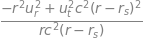

In [41]:
tensor_product(u,u.change_config('l'), 0,0).tensor()